In [58]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA


In [79]:
image_path = r"C:\Users\jiric\Documents\GitHub\Semanticka-segmentace-leteckych-snimku\Model A test\Results\Semantic segmentation of aerial imagery\Sample 3\original_image.jpg"
save_path = r"C:\Users\jiric\Documents\GitHub\Semanticka-segmentace-leteckych-snimku\Model A test\Results\Semantic segmentation of aerial imagery\Sample 3\prediction.png"

scale = 1
# enlarge pixel size
# eg. scale 4 changes pixel size from 25x25cm to 100x100cm

chosen_model = 1
# 1 for Model A
# 2 for Model B
# 3 for Model C

In [80]:

if chosen_model == 1:
    image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
elif chosen_model == 2:
    image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
elif chosen_model == 3:
    image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
else:
    print("ERROR: INVALID MODEL CHOSEN")

print("DONE")

Original image shape: (2061, 1816, 3)
FINNAL TIME: 7.559184551239014
Predicted image shape: (1920, 1760, 3)
DONE


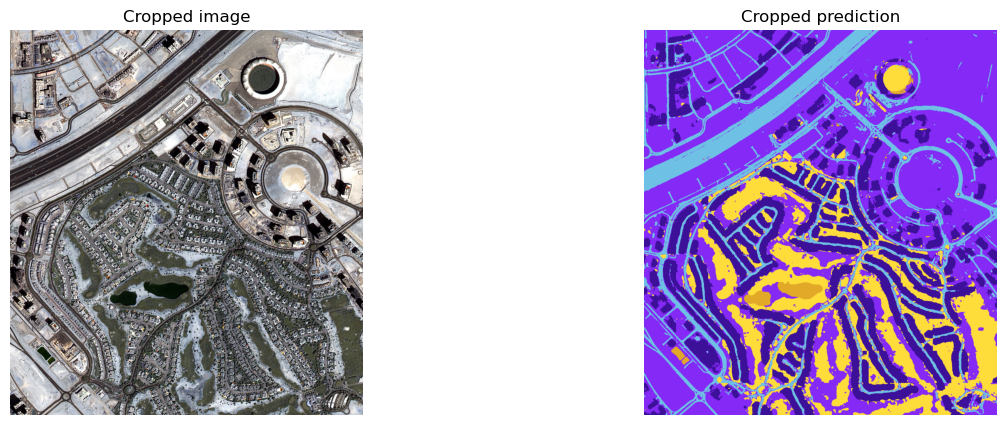

In [81]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(image_cropped)
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_prediction, cmap='binary')
plt.title('Cropped prediction')
plt.axis('off')

plt.show()

In [82]:
image_prediction_rgb = cv2.cvtColor(image_prediction, cv2.COLOR_RGB2BGR)
cv2.imwrite(save_path, image_prediction_rgb)

True